<a href="https://colab.research.google.com/github/mikhailchahin/Salary-Anywhere/blob/main/Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url2 = "https://www.kaggle.com/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024"
od.download(url2)
#{"username":"mikhailacevedo","key":"80f803e4972cccfe14e49ddc51a4b2fd"

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mikhailacevedo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024


100%|██████████| 11.1k/11.1k [00:00<00:00, 15.9MB/s]

In [ ]:
import os
# Importa el módulo 'os' para interactuar con el sistema operativo.

os.chdir("work-from-anywhere-salary-insight-2024")
# Cambia el directorio de trabajo actual a la carpeta especificada.

os.listdir()
# Lista todos los archivos y subdirectorios dentro del directorio actual.


['Work_From_Anywhere_Salary_Data.csv']

In [ ]:
df = pd.read_csv("Work_From_Anywhere_Salary_Data.csv")
# **Lee un archivo CSV**: Carga el contenido del archivo "Work_From_Anywhere_Salary_Data.csv" en un DataFrame de pandas.


df.head()
# **Muestra las primeras filas**: Este comando muestra las primeras 5 filas del DataFrame 'df'.

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82


In [ ]:
#SELECCION EL DATAFRAME PARA VER LOS TIPOS DE DATOS
df.dtypes

,0
Company,object
Job Title,object
Industry,object
Location,object
Employment Type,object
Experience Level,object
Remote Flexibility,object
Salary (Annual),float64
Currency,object
Years of Experience,float64


In [ ]:
#IDENFICACION DE VALORES NULOS
v_nulos = df.isnull()
print(v_nulos)

     Company  Job Title  Industry  Location  Employment Type  \
0      False      False     False     False            False   
1      False      False     False     False            False   
2      False      False     False     False            False   
3      False      False     False     False            False   
4      False      False     False     False            False   
..       ...        ...       ...       ...              ...   
495    False      False     False     False            False   
496    False      False     False     False            False   
497    False      False     False     False            False   
498    False      False     False     False            False   
499    False      False     False     False            False   

     Experience Level  Remote Flexibility  Salary (Annual)  Currency  \
0               False               False            False     False   
1               False               False            False     False   
2              

In [ ]:
df.describe()
# Incluye información como la media, desviación estándar, valores mínimo y máximo, y cuartiles (25%, 50%, 75%).
# Es muy útil para obtener una visión general rápida de la distribución y características principales de los datos numéricos.

,Salary (Annual),Years of Experience,Job Satisfaction Score (1-10),Last Promotion (Years Ago)
count,500.000000,500.000000,500.000000,500.000000
mean,115390.108680,7.382000,5.660000,2.415560
std,47781.533743,4.209793,2.912966,1.462838
min,30248.550000,0.000000,1.000000,0.000000
25%,75025.795000,3.800000,3.000000,1.057500
50%,111953.730000,7.350000,6.000000,2.360000
75%,156244.655000,10.925000,8.000000,3.692500
max,199927.240000,15.000000,10.000000,4.980000


1- Este código convierte salarios a USD usando tasas de cambio predefinidas. Luego, limpia los datos eliminando valores nulos y visualiza la distribución de los salarios en USD con un histograma.

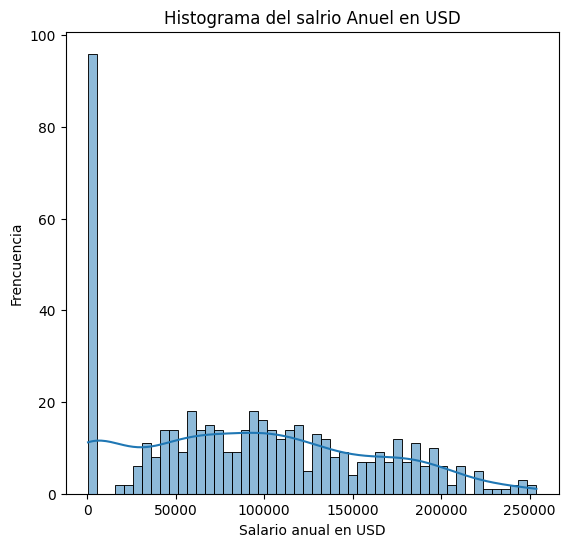

In [ ]:
# Creamos diccionario con valor de las modenas para la convercion
exchange_rates = {
    'USD': 1.0,
    'EUR': 1.08,
    'GBP': 1.27,
    'INR': 0.012,
    'CAD': 0.73,
    'AUD': 0.66,
    'JPY': 0.0064,
}
# Define un diccionario 'exchange_rates' que almacena las tasas de conversión de varias monedas a USD.

def convert_to_usd(row):
    Currency = row["Currency"]
    Salary = row["Salary (Annual)"]
    if Currency in exchange_rates:
        return Salary * exchange_rates[Currency]
    else:
        return Salary
# Define una función 'convert_to_usd' que toma una fila del DataFrame como entrada.
# Extrae la moneda y el salario, y si la moneda está en el diccionario 'exchange_rates',
# convierte el salario a USD usando la tasa correspondiente; de lo contrario, devuelve el salario original.

# Se crea una nueva columna en el df llamado (Salary_Annual_USD')
df['Salary_Annual_USD'] = df.apply(convert_to_usd, axis=1)
# Aplica la función 'convert_to_usd' a cada fila del DataFrame (axis=1) para crear una nueva columna
# llamada 'Salary_Annual_USD', que contiene los salarios convertidos a USD.

df.dropna(subset=["Salary_Annual_USD"],inplace=True)
# Elimina las filas del DataFrame donde la columna 'Salary_Annual_USD' tiene valores nulos (NaN).
# 'inplace=True' modifica el DataFrame directamente.

plt.figure(figsize=(14, 6))
# Crea una nueva figura para el gráfico con un tamaño especificado (ancho=14, alto=6 pulgadas).

plt.subplot(1, 2, 1)
# Crea un subgráfico dentro de la figura. Los argumentos (1, 2, 1) significan:
# 1 fila, 2 columnas, y este es el primer subgráfico.

sns.histplot(df['Salary_Annual_USD'],kde=True,bins=50)
# Genera un histograma de la columna 'Salary_Annual_USD' utilizando Seaborn.

plt.title("Histograma del salrio Anuel en USD")
# Establece el título del subgráfico.
plt.xlabel("Salario anual en USD")
# Establece la etiqueta del eje X.
plt.ylabel("Frencuencia")
# Establece la etiqueta del eje Y.
plt.show()
# Muestra el gráfico generado.

2- Con este código genera un diagrama de caja (box plot) de los salarios anuales en USD. Se crea como el segundo subgráfico en una figura existente, mostrando la distribución de los datos, la mediana, los cuartiles y los valores atípicos de Salary_Annual_USD.



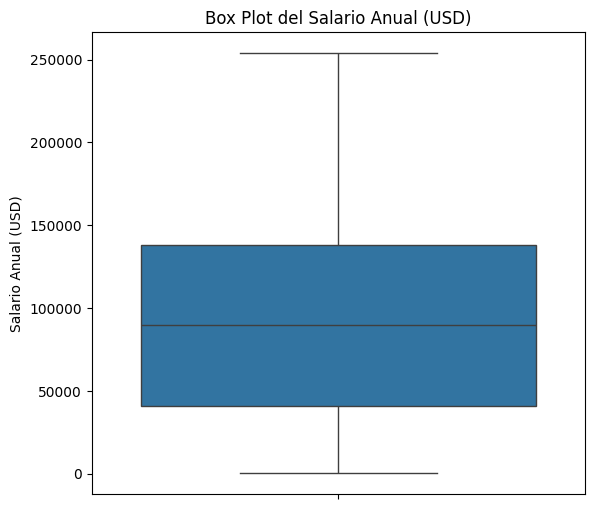

In [ ]:
plt.figure(figsize=(14, 6))
# Crea una nueva figura para el gráfico con un tamaño especificado.

plt.subplot(1, 2, 2)
# Crea un subgráfico dentro de la figura. Los argumentos (1, 2, 2) significan:
# 1 fila, 2 columnas, y este es el segundo subgráfico.

sns.boxplot(y=df['Salary_Annual_USD'])
# El box plot muestra la distribución de los datos, incluyendo la mediana, cuartiles y valores atípicos.
plt.title('Box Plot del Salario Anual (USD)')
# Establece el título del subgráfico.
plt.ylabel('Salario Anual (USD)')
# Establece la etiqueta del eje Y.
plt.show()
# Muestra el gráfico generado.




3- Este fragmento de código visualiza la relación entre años de experiencia y salario anual en USD mediante un gráfico de dispersión.

<Axes: xlabel='Years of Experience', ylabel='Salary_Annual_USD'>

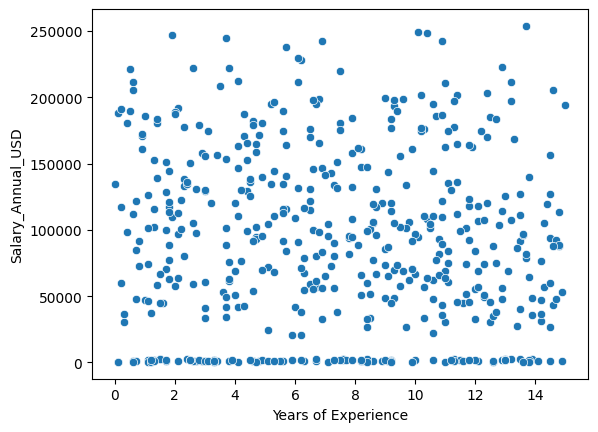

In [ ]:
experiencia_l1 = "Years of Experience"
# Asigna el nombre de la columna "Years of Experience" a la variable `experiencia_l1`.
# Esto mejora la legibilidad del código al usar un nombre más corto y descriptivo.

salrio_l1 = "Salary_Annual_USD"
# Asigna el nombre de la columna "Salary_Annual_USD" a la variable `salrio_l1`.

# Creo grafico de dispercion
sns.scatterplot(data=df, x=experiencia_l1, y=salrio_l1)
# Crea un **gráfico de dispersión** utilizando Seaborn.
# `data=df` especifica que se usará el DataFrame `df`.
# `x=experiencia_l1` define que el eje X representará los "Years of Experience".
# `y=salrio_l1` define que el eje Y representará el "Salary_Annual_USD".
# Este gráfico ayuda a visualizar la relación entre los años de experiencia y el salario anual en USD.

4- Este script analiza las empresas más representadas en el conjunto de datos. Calcula la frecuencia de cada compañía y luego aísla las 10 con más entradas. Finalmente, crea un gráfico de barras para visualizar cuántos empleados o registros corresponden a cada una de estas empresas principales.

/tmp/ipython-input-3958624128.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empresas_mas_empleados.index, y=empresas_mas_empleados.values, palette='viridis')


Text(0, 0.5, 'Número de Empleados (Conteo)')

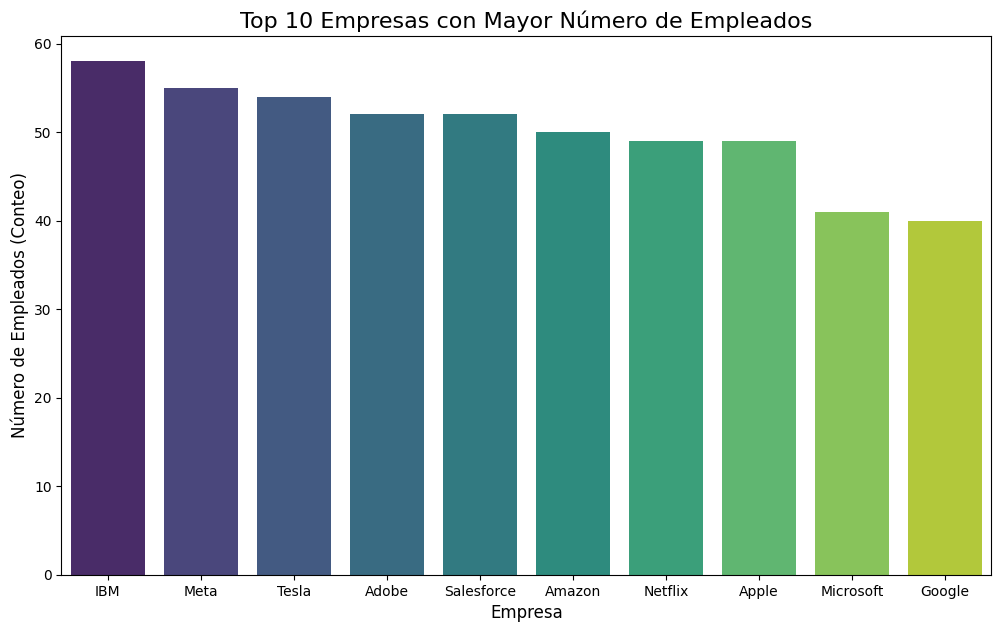

In [ ]:
empresa = 'Company'
# Define una variable para almacenar el nombre de la columna que contiene los nombres de las empresas.

# Contar la frecuencia de cada empresa
conteo_empresas = df[empresa].value_counts()
# Cuenta cuántas veces aparece cada empresa en la columna especificada y almacena el resultado.
# Esto genera una Serie donde el índice son los nombres de las empresas y los valores son sus conteos.

# Por ejemplo, las 10 empresas con más empleados.
top_n_empresas = 10

empresas_mas_empleados = conteo_empresas.head(top_n_empresas)
# Selecciona las 'top_n_empresas' con el mayor número de ocurrencias (es decir, más empleados o entradas).

plt.figure(figsize=(12, 7))
# Crea una nueva figura para el gráfico con un tamaño específico para una mejor visualización.
# Crear el histograma de barras usando seaborn.
# El eje X serán los nombres de las empresas, y el eje Y será el conteo.
sns.barplot(x=empresas_mas_empleados.index, y=empresas_mas_empleados.values, palette='viridis')
# Genera un gráfico de barras (histograma) utilizando Seaborn.
# El eje X muestra los nombres de las empresas (índice de 'empresas_mas_empleados').
# El eje Y muestra el número de empleados (valores de 'empresas_mas_empleados').
# 'palette='viridis'' aplica un esquema de colores predefinido.
plt.title(f'Top {top_n_empresas} Empresas con Mayor Número de Empleados', fontsize=16)
# Establece el título del gráfico, incluyendo dinámicamente el número de empresas mostradas.
plt.xlabel('Empresa', fontsize=12)
# Establece la etiqueta para el eje X (nombre de la empresa).
plt.ylabel('Número de Empleados (Conteo)', fontsize=12)
# Establece la etiqueta para el eje Y

<Axes: xlabel='Years of Experience', ylabel='Salary (Annual)'>

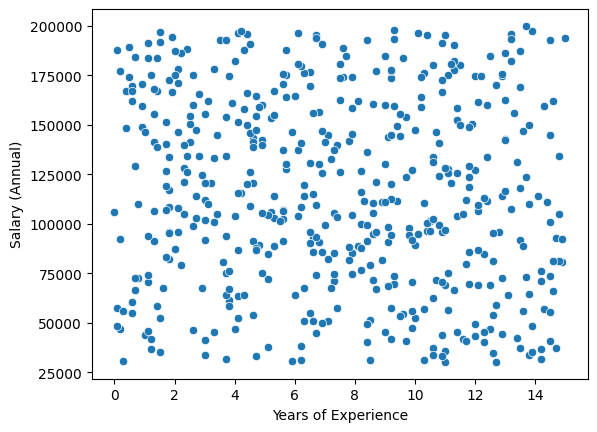

In [ ]:
x = df["Years of Experience"]
y = df["Salary (Annual)"]

sns.scatterplot(data= df,x=x,y=y)

<Axes: >

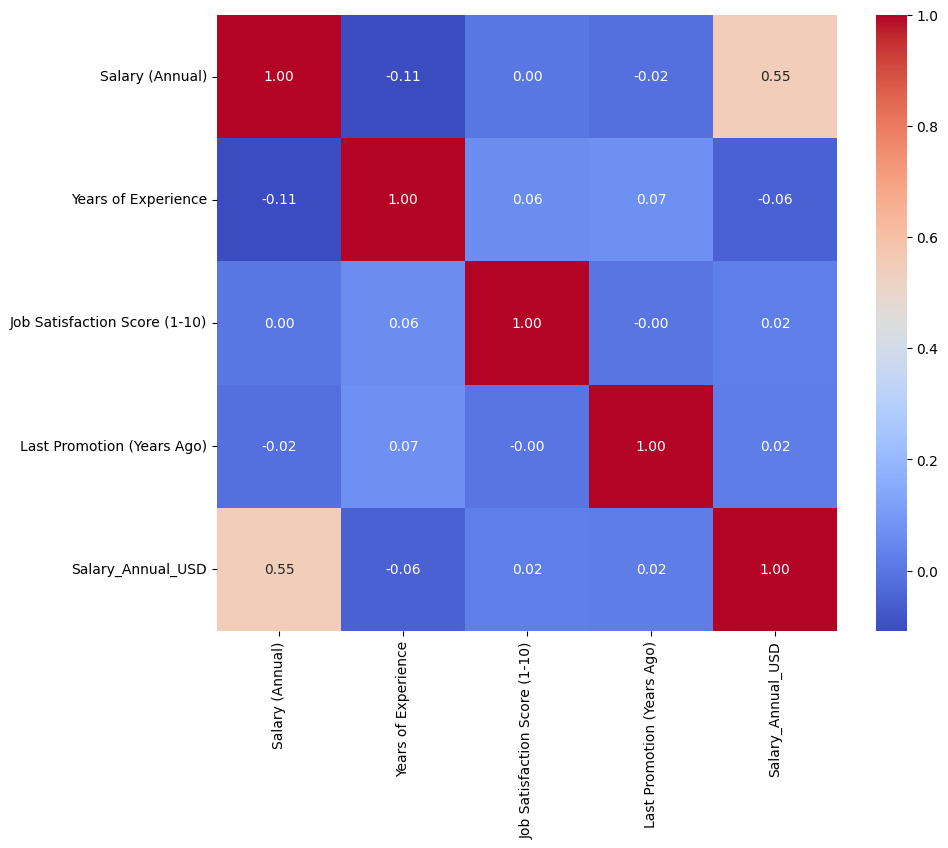

In [ ]:
df_numerico = df.select_dtypes(include=np.number)
correlaciones = df_numerico.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlaciones,annot=True,cmap="coolwarm",fmt=".2f")






In [ ]:
df.columns

Index(['Company', 'Job Title', 'Industry', 'Location', 'Employment Type',
       'Experience Level', 'Remote Flexibility', 'Salary (Annual)', 'Currency',
       'Years of Experience', 'Job Satisfaction Score (1-10)', 'Tech Stack',
       'Perks', 'Last Promotion (Years Ago)', 'Salary_Annual_USD'],
      dtype='object')

Este código te muestra cómo tomar los datos de tu proyecto, aplicar la preparación necesaria (como el One-Hot Encoding), dividir el conjunto en entrenamiento y prueba, y luego usar un modelo de Random Forest para predecir el salario. Al final, calcula el RMSE para darte una medida clara y numérica de qué tan preciso es el modelo, confirmando que es una herramienta efectiva para tus predicciones.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 1. Preparación de datos: Define las variables de entrada (X) y la variable objetivo (y)
# Asume que tu DataFrame se llama 'df' y ya está cargado con todas las columnas
columnas_numericas = ['Years of Experience', 'Job Satisfaction Score (1-10)', 'Last Promotion (Years Ago)']
columnas_categoricas = ['Company', 'Job Title', 'Industry', 'Location', 'Employment Type', 'Experience Level', 'Remote Flexibility']

X = df[columnas_numericas + columnas_categoricas]
y = df['Salary (Annual)']

# 2. Manejo de datos categóricos con One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo Random Forest Regressor (con hiperparámetros por defecto)
# Este es el modelo que te dio el RMSE más bajo de 48,171
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_train, y_train)

# 5. Hacer predicciones y evaluar el rendimiento
y_pred = modelo_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"El Error Cuadrático Medio de la Raíz (RMSE) del Random Forest es: {rmse}")

El Error Cuadrático Medio de la Raíz (RMSE) del Random Forest es: 48171.95435159597


In [ ]:
import joblib

# Asume que 'modelo_rf' es tu mejor modelo ya entrenado
# y 'X_encoded' es el DataFrame con las columnas codificadas

# Guarda el modelo en un archivo
joblib.dump(modelo_rf, 'modelo_random_forest.joblib')

# Guarda la lista de columnas en un archivo
joblib.dump(X_encoded.columns, 'columnas_entrenamiento.joblib')

print("Modelo y columnas guardadas exitosamente.")

Modelo y columnas guardadas exitosamente.


Este código te permite usar un modelo que ya entrenaste para hacer nuevas predicciones. En esencia, tomas los nuevos datos, los preparas exactamente de la misma forma que preparaste los datos de entrenamiento (con el One-Hot Encoding y la alineación de columnas), y luego le pides al modelo que prediga un resultado, en este caso, el salario. Es un paso final crucial para que tu proyecto pase de ser un experimento a una herramienta funcional

In [ ]:


# Carga el modelo y las columnas desde los archivos
modelo_cargado = joblib.load('modelo_random_forest.joblib')
columnas_entrenamiento = joblib.load('columnas_entrenamiento.joblib')

print("Modelo y columnas cargadas exitosamente.")

# --- Simula nuevos datos que quieres predecir ---
# Estos son los datos nuevos, en su formato original
datos_nuevos = pd.DataFrame({
    'Years of Experience': [6, 11, 2],
    'Job Satisfaction Score (1-10)': [8, 7, 5],
    'Last Promotion (Years Ago)': [3, 4, 1],
    'Company': ['Google', 'Netflix', 'Amazon'],
    'Job Title': ['Data Scientist', 'Product Manager', 'Data Analyst'],
    'Industry': ['Tech', 'Media', 'Tech'],
    'Location': ['San Francisco', 'New York', 'Seattle'],
    'Employment Type': ['Full-time', 'Full-time', 'Full-time'],
    'Experience Level': ['Mid', 'Senior', 'Junior'],
    'Remote Flexibility': ['Hybrid', 'Onsite', 'Remote']
})

# --- Pipeline de Preprocesamiento para los datos nuevos ---
# 1. Aplicar One-Hot Encoding
datos_codificados_nuevos = pd.get_dummies(datos_nuevos, drop_first=True)

# 2. Alinear las columnas con las de entrenamiento (PASO CRÍTICO)
# Esto añade las columnas que faltan y pone todo en el orden correcto
datos_finales = datos_codificados_nuevos.reindex(columns=columnas_entrenamiento, fill_value=0)

# 3. Hacer las predicciones
predicciones_salario = modelo_cargado.predict(datos_finales)

# 4. Mostrar los resultados
datos_nuevos['Salario Predicho'] = predicciones_salario.round(2)
print("\nPredicciones de Salario para los nuevos datos:")
print(datos_nuevos)

Modelo y columnas cargadas exitosamente.

Predicciones de Salario para los nuevos datos:
   Years of Experience  Job Satisfaction Score (1-10)  \
0                    6                              8   
1                   11                              7   
2                    2                              5   

   Last Promotion (Years Ago)  Company        Job Title Industry  \
0                           3   Google   Data Scientist     Tech   
1                           4  Netflix  Product Manager    Media   
2                           1   Amazon     Data Analyst     Tech   

        Location Employment Type Experience Level Remote Flexibility  \
0  San Francisco       Full-time              Mid             Hybrid   
1       New York       Full-time           Senior             Onsite   
2        Seattle       Full-time           Junior             Remote   

   Salario Predicho  
0         112207.56  
1         115613.62  
2         128749.53  
